# Credit Risk — Optimizing Data Types
### for CEBD1260: Introduction to Machine Learning
*by Pierre-Olivier Bonin*

# Importing Libraries and Exploring the Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm
import glob

In [2]:
DATA_PATH = 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\'

In [3]:
all_files = glob.glob(DATA_PATH+'*.csv')
all_files

['D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\application_train.csv',
 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\bureau.csv',
 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\bureau_balance.csv',
 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\credit_card_balance.csv',
 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\df_folded.csv',
 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\HomeCredit.csv',
 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\HomeCredit_columns_description.csv',
 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\installments_payments.csv',
 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\POS_CASH_balance.csv',
 'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\previous_application.csv']

In [4]:
all_files[8]

'D:\\Documents\\Pierre-Olivier\\CEBD1260\\Datasets\\POS_CASH_balance.csv'

In [5]:
print(f"There are {len(all_files)} files to work with.") # print all files in the data directory

There are 10 files to work with.


In [6]:
desc_df = pd.read_csv("D:/Documents/Pierre-Olivier/CEBD1260/Datasets/HomeCredit.csv", encoding="latin1")
desc_df = desc_df.drop("Unnamed: 0", axis=1)
maindf = pd.read_csv("D:/Documents/Pierre-Olivier/CEBD1260/Datasets/application_train.csv")
df2 = pd.read_csv("D:/Documents/Pierre-Olivier/CEBD1260/Datasets/bureau.csv")
df3 = pd.read_csv("D:/Documents/Pierre-Olivier/CEBD1260/Datasets/bureau_balance.csv")
df4 = pd.read_csv("D:/Documents/Pierre-Olivier/CEBD1260/Datasets/credit_card_balance.csv")
df5 =  pd.read_csv("D:/Documents/Pierre-Olivier/CEBD1260/Datasets/installments_payments.csv")
df6 = pd.read_csv("D:/Documents/Pierre-Olivier/CEBD1260/Datasets/POS_CASH_balance.csv")
df7 = pd.read_csv("D:/Documents/Pierre-Olivier/CEBD1260/Datasets/previous_application.csv")


In [7]:
maindf.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
desc_df['Table'].unique(), desc_df['Table'].nunique() # but we know that we actually have 7 datasets to work with.
print(f"There are {desc_df['Table'].nunique()} datasets to work with.")

There are 7 datasets to work with.


In [9]:
dflist = [maindf, df2, df3, df4, df5, df6, df7]

In [39]:
### INSTRUCTIONS ###
# To execute the present script, load the datasets to be cleaned and then put them into a list of dataframes.
# We will call the dataframe list 'dflist', such that you must run first the following:
# dflist = [] <-- here you insert your dataframes and separate with commas. Once you're done, run the script below.


# Print initial memory usage details
mem_sum = 0
for i in dflist:
    print('Memory usage of dataframe is {:.6f} GB'.format(i.memory_usage().sum()/1000000000))
    mem_sum = mem_sum+i.memory_usage().sum()/1000000000
print(f"Total memory used for all dataframes is: {mem_sum:.2f}GB")

# Construct dataframe for reference used below in the optimize_inttypes function.
np_types = [np.int8 ,np.int16 ,np.int32, np.int64,
           np.uint8 ,np.uint16, np.uint32, np.uint64]
np_types = [np_type.__name__ for np_type in np_types]
type_df = pd.DataFrame(data=np_types, columns=['class_type'])
type_df['min_value'] = type_df['class_type'].apply(lambda row: np.iinfo(row).min)
type_df['max_value'] = type_df['class_type'].apply(lambda row: np.iinfo(row).max)
type_df['range'] = type_df['max_value'] - type_df['min_value']
type_df.sort_values(by='range', inplace=True)

# Create function to optimize integer data types
def optimize_inttypes(dataframe):
    for col in dataframe.loc[:, dataframe.dtypes <= np.int64]:
        col_min = dataframe[col].min()
        col_max = dataframe[col].max()
        temp = type_df[(type_df['min_value'] <= col_min) & (type_df['max_value'] >= col_max)]
        optimized_class = temp.loc[temp['range'].idxmin(), 'class_type']
        print("Col name : {} Col min_value : {} Col max_value : {} Optimized Class : {}".format(col, col_min, col_max, optimized_class))
        dataframe[col] = dataframe[col].astype(optimized_class)

# Run integer optimization over all dataframes.
for i in dflist:
    optimize_inttypes(i)

# Print updated memory usage details
mem_sum = 0
for i in dflist:
    print('Memory usage of dataframe is {:.6f} GB'.format(i.memory_usage().sum()/1000000000))
    mem_sum = mem_sum+i.memory_usage().sum()/1000000000
print(f"Total memory used for all dataframes is: {mem_sum:.2f}GB")

####################################################################################################
####################################################################################################

# Create dataframe for reference, used in the float optimization function further below.
np_types = [np.float16 ,np.float32, np.float64]
np_types = [np_type.__name__ for np_type in np_types]
floattype_df = pd.DataFrame(data=np_types, columns=['class_type'])
floattype_df['min_value'] = floattype_df['class_type'].apply(lambda row: np.finfo(row).min)
floattype_df['max_value'] = floattype_df['class_type'].apply(lambda row: np.finfo(row).max)
floattype_df['range'] = floattype_df['max_value'] - floattype_df['min_value']
floattype_df.sort_values(by='range', inplace=True)

# Create float optimization function.
def optimize_floattypes(dataframe):
    for col in dataframe.loc[:, dataframe.dtypes == np.float64]:
        col_min = dataframe[col].min()
        col_max = dataframe[col].max()
        temp = floattype_df[(floattype_df['min_value'] <= col_min) & (floattype_df['max_value'] >= col_max)]
        optimized_class = temp.loc[temp['range'].idxmin(), 'class_type']
        print("Col name : {} Col min_value : {} Col max_value : {} Optimized Class : {}".format(col, col_min, col_max, optimized_class))
        dataframe[col] = dataframe[col].astype(optimized_class)

# Run float optimization over all dataframes.
for i in dflist:
    optimize_floattypes(i)

# Print updated memory usage details
mem_sum = 0
for i in dflist:
    print('Memory usage of dataframe is {:.6f} GB'.format(i.memory_usage().sum()/1000000000))
    mem_sum = mem_sum+i.memory_usage().sum()/1000000000
print(f"Total memory used for all dataframes is: {mem_sum:.2f}GB")

Memory usage of dataframe is 0.300131 GB
Memory usage of dataframe is 0.233434 GB
Memory usage of dataframe is 0.655198 GB
Memory usage of dataframe is 0.706618 GB
Memory usage of dataframe is 0.870746 GB
Memory usage of dataframe is 0.640087 GB
Memory usage of dataframe is 0.494383 GB
Total memory used for all dataframes is: 3.90GB
Col name : SK_ID_CURR Col min_value : 100002 Col max_value : 456255 Optimized Class : int32
Col name : TARGET Col min_value : 0 Col max_value : 1 Optimized Class : int8
Col name : CNT_CHILDREN Col min_value : 0 Col max_value : 19 Optimized Class : int8
Col name : DAYS_BIRTH Col min_value : -25229 Col max_value : -7489 Optimized Class : int16
Col name : DAYS_EMPLOYED Col min_value : -17912 Col max_value : 365243 Optimized Class : int32
Col name : DAYS_ID_PUBLISH Col min_value : -7197 Col max_value : 0 Optimized Class : int16
Col name : FLAG_MOBIL Col min_value : 0 Col max_value : 1 Optimized Class : int8
Col name : FLAG_EMP_PHONE Col min_value : 0 Col max_va

Col name : ELEVATORS_AVG Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : ENTRANCES_AVG Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : FLOORSMAX_AVG Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : FLOORSMIN_AVG Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : LANDAREA_AVG Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : LIVINGAPARTMENTS_AVG Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : LIVINGAREA_AVG Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : NONLIVINGAPARTMENTS_AVG Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : NONLIVINGAREA_AVG Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : APARTMENTS_MODE Col min_value : 0.0 Col max_value : 1.0 Optimized Class : float16
Col name : BASEMENTAREA_MODE Col min_value : 0.0 Col max_value : 1.

Col name : RATE_DOWN_PAYMENT Col min_value : -1.4978763414307848e-05 Col max_value : 1.0 Optimized Class : float16
Col name : RATE_INTEREST_PRIMARY Col min_value : 0.0347812535418791 Col max_value : 1.0 Optimized Class : float16
Col name : RATE_INTEREST_PRIVILEGED Col min_value : 0.3731501057082452 Col max_value : 1.0 Optimized Class : float16
Col name : CNT_PAYMENT Col min_value : 0.0 Col max_value : 84.0 Optimized Class : float16
Col name : DAYS_FIRST_DRAWING Col min_value : -2922.0 Col max_value : 365243.0 Optimized Class : float32
Col name : DAYS_FIRST_DUE Col min_value : -2892.0 Col max_value : 365243.0 Optimized Class : float32
Col name : DAYS_LAST_DUE_1ST_VERSION Col min_value : -2801.0 Col max_value : 365243.0 Optimized Class : float32
Col name : DAYS_LAST_DUE Col min_value : -2889.0 Col max_value : 365243.0 Optimized Class : float32
Col name : DAYS_TERMINATION Col min_value : -2874.0 Col max_value : 365243.0 Optimized Class : float32
Col name : NFLAG_INSURED_ON_APPROVAL Col mi

> We went from an initial memory usage of 3.90GB to 2.80GB to 1.77GB. Pretty good!

In [40]:
# To make sure the changes have been made
for i in dflist:
    print(i.dtypes)

SK_ID_CURR                        int32
TARGET                             int8
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                       int8
AMT_INCOME_TOTAL                float32
AMT_CREDIT                      float32
AMT_ANNUITY                     float32
AMT_GOODS_PRICE                 float32
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float16
DAYS_BIRTH                        int16
DAYS_EMPLOYED                     int32
DAYS_REGISTRATION               float16
DAYS_ID_PUBLISH                   int16
OWN_CAR_AGE                     float16
FLAG_MOBIL                         int8
FLAG_EMP_PHONE                     int8
FLAG_WORK_PHONE                    int8


In [41]:
for i in dflist:
    print(i.shape)

(307511, 122)
(1716428, 17)
(27299925, 3)
(3840312, 23)
(13605401, 8)
(10001358, 8)
(1670214, 37)


# Dealing with Missing Values

In [70]:
maindf.dtypes

SK_ID_CURR                        int32
TARGET                             int8
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                       int8
AMT_INCOME_TOTAL                float32
AMT_CREDIT                      float32
AMT_ANNUITY                     float32
AMT_GOODS_PRICE                 float32
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float16
DAYS_BIRTH                        int16
DAYS_EMPLOYED                     int32
DAYS_REGISTRATION               float16
DAYS_ID_PUBLISH                   int16
OWN_CAR_AGE                     float16
FLAG_MOBIL                         int8
FLAG_EMP_PHONE                     int8
FLAG_WORK_PHONE                    int8


In [69]:
for i, j in zip(maindf.columns, maindf.dtypes):
    if j !='float32' or 'O' or 'int8':
        print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [51]:
maindf.select_dtypes(exclude=['O', 'int', 'uint']).columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=104)

In [50]:
for i in dflist:
    print(i.select_dtypes(exclude=['object', 'int', 'uint']).columns)

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=104)
Index(['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY'],
      dtype='object')
Index(['MONTHS_BALANCE'], dtype='object')
Index(['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
      

In [ ]:
for i in dflist:
    missing = [i.isnull().sum()/i.shape[0]*100]
    if missing>90

In [ ]:
for i in dflist:
    if i.dtypes==

In [ ]:
train_df_sesame['COMMONAREA_AVG'].fillna(train_df_sesame['COMMONAREA_AVG'].median(),inplace=True)

In [37]:
maindf.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [36]:
non_objectCols = []
for i,j in zip(maindf.dtypes.index, maindf.dtypes.values):
    if j!="object":
        non_objectCols.append(i)
print(non_objectCols)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEAR

In [26]:
null_cols = []
for i, j in zip(maindf.isnull().sum().index, maindf.isnull().sum().values):
    if j>0:
        null_cols.append(i)
print(null_cols)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',

In [29]:
non_BooleanCols = []
for i, j in zip(maindf.nunique().index, maindf.nunique().values):
    if j>2:
        non_BooleanCols.append(i)
print(non_BooleanCols)

['SK_ID_CURR', 'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', '

In [40]:
preprocessing_cols = list(set(non_objectCols).intersection(null_cols,non_BooleanCols))
len(preprocessing_cols)

61

In [62]:
print(preprocessing_cols)

['LIVINGAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_MON', 'LIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'LIVINGAPARTMENTS_MEDI', 'ENTRANCES_MEDI', 'LIVINGAREA_MEDI', 'LIVINGAPARTMENTS_AVG', 'AMT_GOODS_PRICE', 'YEARS_BEGINEXPLUATATION_MEDI', 'NONLIVINGAREA_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'LANDAREA_AVG', 'LANDAREA_MODE', 'CNT_FAM_MEMBERS', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'BASEMENTAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'APARTMENTS_AVG', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'OWN_CAR_AGE', 'EXT_SOURCE_3', 'NONLIVINGAREA_AVG', 'LIVINGAPARTMENTS_MODE', 'FLOORSMAX_MEDI', 'ENTRANCES_MODE', 'FLOORSMIN_MEDI', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'ELEVATORS_MODE', 'APARTMENTS_MODE', 'TOTALAREA_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'YEARS_BEGINEXPLUATATION_MODE', 'BASEMENTAREA_MEDI', 'ELEVATORS_AVG', 'BASEMENTAREA_AVG', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FLOORSMIN_AVG', 'AMT_REQ_CREDIT_BUREAU_QRT', 'OBS_60_CNT_SOCIAL_CIRCLE', 'YEARS_BEGIN

We now know that there are **61 columns** in the main dataframe that share the following characteristics:
* they are non-categorical features (i.e. they are not of the 'object' data type... but perhaps there remains some hidden columns that are categorical despite being non-object data type... We could try using a threshold so that, for instance, when nunique()>2 but <20, then it would be considered a categorical feature.)
* they have missing values
* they are not Boolean (i.e. they have more than 2 unique values)

In [61]:
len(maindf.columns)

122

In [41]:
maindf[preprocessing_cols]

,LIVINGAREA_MODE,AMT_REQ_CREDIT_BUREAU_MON,LIVINGAREA_AVG,NONLIVINGAREA_MODE,LIVINGAPARTMENTS_MEDI,ENTRANCES_MEDI,LIVINGAREA_MEDI,LIVINGAPARTMENTS_AVG,AMT_GOODS_PRICE,YEARS_BEGINEXPLUATATION_MEDI,...,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,EXT_SOURCE_1,COMMONAREA_AVG,ELEVATORS_MEDI,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MEDI,APARTMENTS_MEDI,YEARS_BUILD_AVG
0,0.0198,0.0,0.0190,0.0000,0.0205,0.0690,0.0193,0.0202,351000.0,0.9722,...,0.0000,0.0,0.083037,0.0143,0.00,0.0833,0.1250,0.0375,0.0250,0.6192
1,0.0554,0.0,0.0549,0.0000,0.0787,0.0345,0.0558,0.0773,1129500.0,0.9851,...,0.0039,0.0,0.311267,0.0605,0.08,0.2917,0.3333,0.0132,0.0968,0.7960
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,135000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,513000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0853,NaN,0.1965,0.0125,0.1509,0.1034,0.2001,0.1484,225000.0,0.9876,...,0.0757,0.0,0.145570,0.0202,0.22,0.4583,0.0417,0.0605,0.2040,0.8300
307507,0.0267,NaN,0.0257,0.0000,0.0205,0.1034,0.0261,0.0202,225000.0,0.9727,...,0.0000,0.0,NaN,0.0022,0.00,0.0833,0.1250,0.0589,0.0250,0.6260
307508,0.9667,1.0,0.9279,0.0000,0.0855,0.2069,0.9445,0.0841,585000.0,0.9816,...,0.0000,0.0,0.744026,0.0123,0.00,0.1667,0.2083,NaN,0.1041,0.7484
307509,0.0063,0.0,0.0061,NaN,NaN,0.0690,0.0062,NaN,319500.0,0.9771,...,NaN,NaN,NaN,NaN,NaN,0.0417,NaN,NaN,0.0125,NaN


In [59]:
maindf[preprocessing_cols].nunique().min(), maindf[preprocessing_cols].nunique().max(), maindf[preprocessing_cols].nunique().median()

(5, 119828, 305.0)

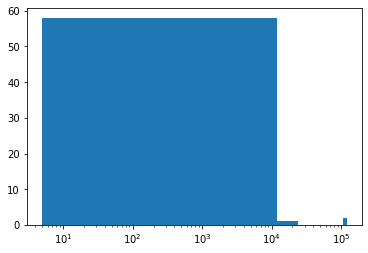

In [54]:
plt.hist(maindf[preprocessing_cols].nunique().values)
plt.xscale('log')